In [1]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

import os

In [2]:
from pypoptim.postprocessing import collect_results

In [3]:
dirname, case = "../ga/pypoptim/results", "210702_172843"

output_dict = collect_results(case, dirname, load_dump=False)

In [4]:
output_dict.keys()

dict_keys(['trio', 'genes', 'dump_last', 'dump_elite', 'dump', 'phenotype_model_last', 'config', 'genes_best', 'state'])

In [15]:
config = output_dict['config']

genes_best = output_dict['genes_best']
phenotype = output_dict['phenotype_model_last']['trace_1']
dump_elite = output_dict['dump_elite']
dump_last = output_dict['dump_last']

In [16]:
loss = -dump_elite[:, -1]
dump_elite = pd.DataFrame(dump_elite[:, :-1], columns=config['runtime']['m_index'])
dump_elite = dump_elite.T.reset_index(level=0, drop=True).T.astype(float)

In [17]:
dump_last = dump_last.T.reset_index(level=0, drop=True).T.astype(float)
dump_elite

g_name,c_p,c_m,a0_m,b0_m,delta_m,s_m,a0_h,b0_h,delta_h,s_h,...,g_leak,tau_z,v_half_m,v_half_h,k_m,k_h,x_c_comp,x_r_comp,alpha,v_off
0,2.642140,0.270097,2.052925,7.686428,2.006821,0.552635,0.223678,6.755298,8.839036,0.113801,...,0.553940,0.380234,13.627612,66.969287,1.922519,9.301870,0.492154,0.889245,0.735304,4.441715
1,1.848906,3.088902,0.537168,0.816026,0.439063,8.567465,0.269853,1.883836,7.820577,0.589299,...,0.182392,3.984712,57.199224,76.227022,1.941061,2.122397,0.085750,0.434705,0.788194,-2.940837
2,1.848906,3.088902,0.537168,0.816026,0.439063,8.567465,0.269853,1.883836,7.820577,0.589299,...,0.182392,3.984712,57.199224,76.227022,1.941061,2.122397,0.085750,0.434705,0.788194,-2.940837
3,0.753249,1.846970,3.664528,3.990555,0.157519,3.017422,1.439568,3.221695,4.985973,0.856547,...,0.117687,5.538546,10.413014,80.483014,9.552462,9.823585,0.238889,0.728888,0.776423,13.393500
4,0.753249,1.846970,3.664528,3.990555,0.157519,3.017422,1.439568,3.221695,4.985973,0.856547,...,0.117687,5.538546,10.413014,80.483014,9.552462,9.823585,0.238889,0.728888,0.776423,13.393500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.122235,1.859873,5.282953,7.983454,3.689839,0.120438,0.136835,0.169197,3.066763,0.262819,...,0.173049,0.867327,28.003763,78.914293,3.171603,6.662046,0.404487,0.910193,0.754910,8.187854
96,0.122235,1.859873,5.282953,7.983454,3.689839,0.120438,0.136835,0.169197,3.066763,0.262819,...,0.173049,0.867327,28.003763,78.914293,3.171603,6.662046,0.404487,0.910193,0.754910,8.187854
97,0.122235,1.859873,5.282953,7.983454,3.689839,0.120438,0.136835,0.169197,3.066763,0.262819,...,0.173049,0.867327,28.003763,78.914293,3.171603,6.662046,0.404487,0.910193,0.754910,8.187854
98,0.122235,1.859873,5.282953,7.983454,3.689839,0.120438,0.136835,0.169197,3.066763,0.262819,...,0.173049,0.867327,28.003763,78.914293,3.171603,6.662046,0.404487,0.910193,0.754910,8.187854


/home/nik/.local/lib/python3.8/site-packages/matplotlib/colors.py:1061: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/home/nik/.local/lib/python3.8/site-packages/matplotlib/colors.py:1062: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)


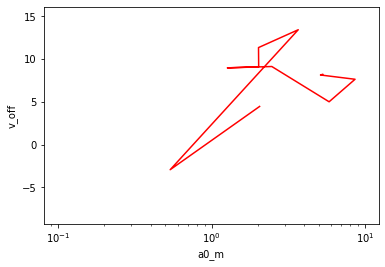

In [18]:
x='a0_m'
y='v_off'

sns.scatterplot(data=dump_last, x=x, y=y, hue='fitness')
plt.plot(dump_elite[x], dump_elite[y], '-r')

plt.xscale('log')
# plt.yscale('log')

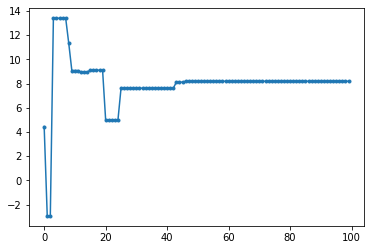

In [19]:
plt.plot(dump_elite['v_off'], '.-')

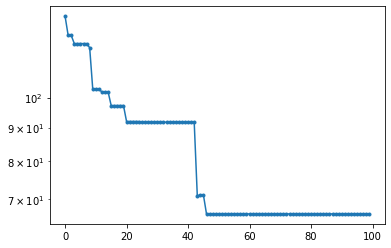

In [21]:
plt.semilogy(loss, '.-')

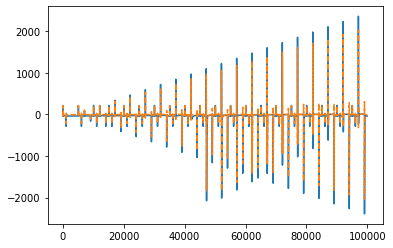

In [25]:
plt.plot(pd.read_csv('../data/training/artificial_data.csv').V)
plt.plot(phenotype, '--')
